In [6]:
import numpy as np
# from matplotlib import colors, ticker, cm
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import pickle
import time
%matplotlib inline
sns.set_style('ticks');
pal = sns.color_palette('Dark2', n_colors=2, desat=.6)
sns.set_palette(pal)
sns.set_context(context='paper', font_scale=1.5)


In [7]:
opt_sig = pd.read_csv('NEW_sigma_player2.csv')[['trial '+str(i) for i in range(1,11)]]
opt_sig.index.name='time'
opt_sig['Play No.']=range(opt_sig.shape[0])
opt_sig = pd.melt(opt_sig, id_vars=['Play No.'], value_name='Best Score')
opt_sig['Kernel Type'] = 'Human' 
# opt_sig

In [8]:
unit_sig = pd.read_csv('NEW_unit_sigma_player2.csv')[['trial '+str(i) for i in range(1,11)]]
unit_sig.index.name='time'
unit_sig['Play No.']=range(unit_sig.shape[0])
unit_sig = pd.melt(unit_sig, id_vars=['Play No.'], value_name='Best Score')
unit_sig['Kernel Type'] = 'Unit' 

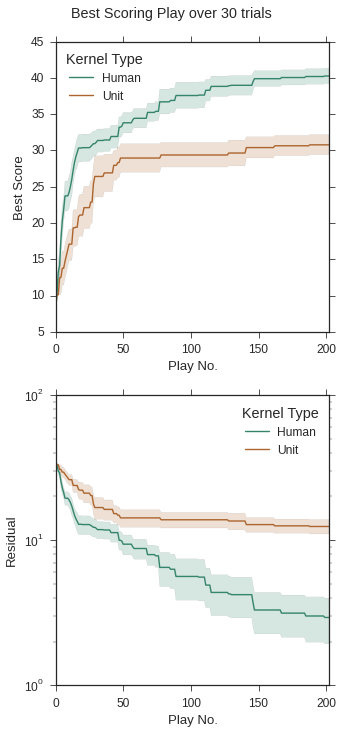

In [9]:
f,ax = plt.subplots(nrows = 2, figsize = (5,10))
sims = pd.concat([opt_sig, unit_sig])
sims['Residual'] = 43.2 - sims['Best Score']

sns.tsplot(sims, time='Play No.', unit='variable', value='Best Score', condition='Kernel Type',
           ci=[68], err_style=['ci_band'], ax=ax[0])
sns.tsplot(sims, time='Play No.', unit='variable', value='Residual', condition='Kernel Type',
           ci=[68], err_style=['ci_band'], ax=ax[1])
ax[1].set_yscale("log", nonposy='clip')
f.suptitle('Best Scoring Play over 30 trials', y=1.02)
plt.tight_layout()
# sns.tsplot(unit_sig.T.values, color=pal[1], ci=[68], err_style=['ci_band'])

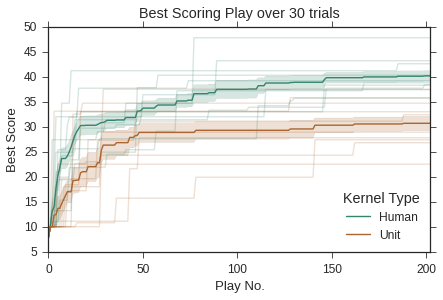

In [10]:
sns.tsplot(sims, time='Play No.', unit='variable', value='Best Score', condition='Kernel Type',
           ci=[68], err_style=['ci_band', 'unit_traces'])
plt.title('Best Scoring Play over 30 trials', y=1.02)
plt.tight_layout()

TypeError: cannot concatenate 'str' and 'int' objects

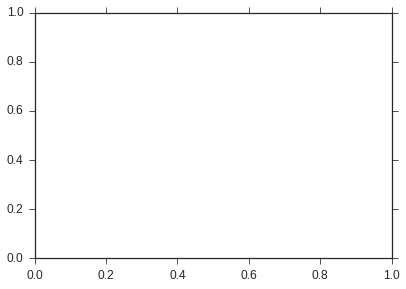

In [11]:
sns.tsplot(unit_sig.T.values, color='r', err_style='unit_traces')
plt.ylim(5,50)

<IPython.core.display.Javascript object>


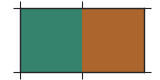

In [12]:
sns.choose_colorbrewer_palette('q')

In [22]:
sims[sims['Lambda']=='Human']['Score Log-Convergence'].shape

(2030L,)

<IPython.core.display.Javascript object>


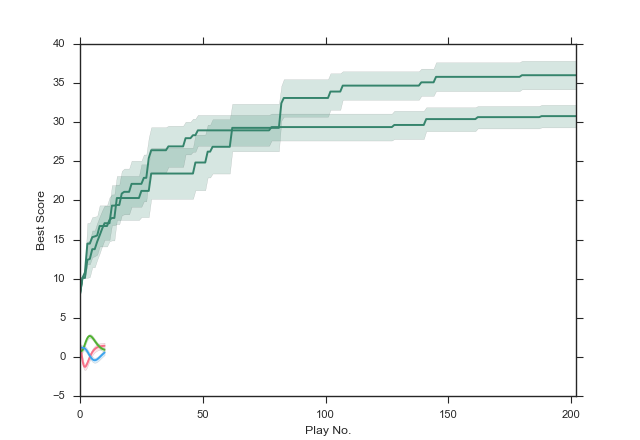

In [40]:
gam = sns.load_dataset('gammas')
sns.tsplot(time="timepoint", value="BOLD signal",
           unit="subject", condition="ROI",
           data=gam)

In [41]:
gam

,timepoint,ROI,subject,BOLD signal
0,0,IPS,0,0.513433
1,0,IPS,1,-0.414368
2,0,IPS,2,0.214695
3,0,IPS,3,0.814809
4,0,IPS,4,-0.894992
5,0,IPS,5,-0.073709
6,0,IPS,6,3.542734
7,0,IPS,7,0.080169
8,0,IPS,8,1.547083
9,0,IPS,9,2.827153
